In [1]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import cv2
import matplotlib.pyplot as plt
from skimage import measure, morphology
from skimage.color import label2rgb
from skimage.measure import regionprops
import numpy as np

In [2]:
img = cv2.imread(r'C:\Users\pawvaibh\Downloads\in1.jpg', cv2.IMREAD_GRAYSCALE)

image mean value : 245.331656885759
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


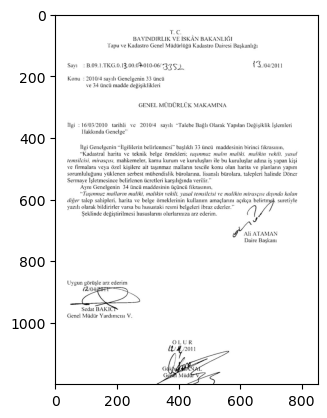

In [3]:
print('image mean value :',img.mean())
print(img)
plt.imshow(img, cmap='gray')

image mean value : 246.25283157276996
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


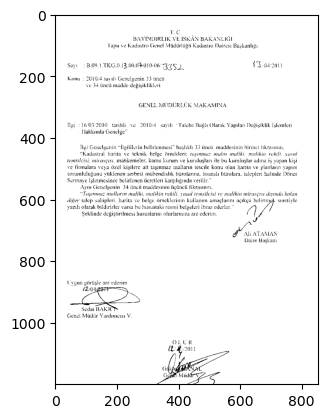

In [4]:
img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1] 
print('image mean value :',img.mean())
print(img)
plt.imshow(img, cmap='gray')

In [5]:
blobs = img > img.mean()
print(blobs)

blobs_labels = measure.label(blobs, background=1)
print(np.unique(blobs_labels))
print(len(np.unique(blobs_labels)))

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
[   0    1    2 ... 2388 2389 2390]
2391


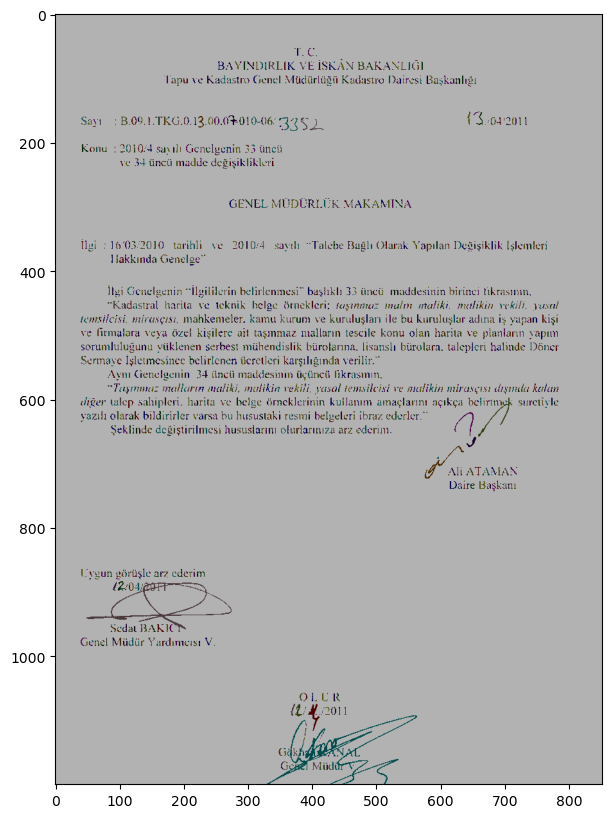

In [6]:
image_label_overlay = label2rgb(blobs_labels, image=img)
if image_label_overlay.shape[-1] == 3 and len(image_label_overlay.shape) > 2:
    # Select the first three dimensions
    image_label_overlay = image_label_overlay[:, :, :3]
plt.figure(figsize=(10,10))
plt.imshow(image_label_overlay)

In [7]:
the_biggest_component = 0
total_area = 0
counter = 0
average = 0.0
for region in regionprops(blobs_labels):
    if (region.area > 10):
        total_area = total_area + region.area
        counter = counter + 1
    print('region.area  :',region.area) # (for debugging)
    if (region.area >= 1000):
        if (region.area > the_biggest_component):
            the_biggest_component = region.area
            print('the_biggest_component **************: ',the_biggest_component)
print('number of region with more than 10 pixels',counter)
print('total pixels that belong to a region with more than 10 pixels',total_area)

region.area  : 2.0
region.area  : 24.0
region.area  : 2.0
region.area  : 23.0
region.area  : 4.0
region.area  : 2.0
region.area  : 2.0
region.area  : 2.0
region.area  : 5.0
region.area  : 2.0
region.area  : 4.0
region.area  : 48.0
region.area  : 24.0
region.area  : 6.0
region.area  : 27.0
region.area  : 27.0
region.area  : 18.0
region.area  : 22.0
region.area  : 51.0
region.area  : 31.0
region.area  : 26.0
region.area  : 47.0
region.area  : 4.0
region.area  : 37.0
region.area  : 1.0
region.area  : 26.0
region.area  : 5.0
region.area  : 4.0
region.area  : 28.0
region.area  : 55.0
region.area  : 37.0
region.area  : 4.0
region.area  : 24.0
region.area  : 3.0
region.area  : 25.0
region.area  : 22.0
region.area  : 13.0
region.area  : 22.0
region.area  : 23.0
region.area  : 1.0
region.area  : 26.0
region.area  : 38.0
region.area  : 25.0
region.area  : 3.0
region.area  : 24.0
region.area  : 24.0
region.area  : 20.0
region.area  : 25.0
region.area  : 21.0
region.area  : 4.0
region.area  : 1.0


In [8]:
average = (total_area/counter)
print("the_biggest_component: " , the_biggest_component)
print("average: " , average)

constant = average/img.shape[0]*img.shape[1]*7.75
print("a4_constant: " ,constant)

the_biggest_component:  2501.0
average:  22.795604395604396
a4_constant:  125.4328131868132


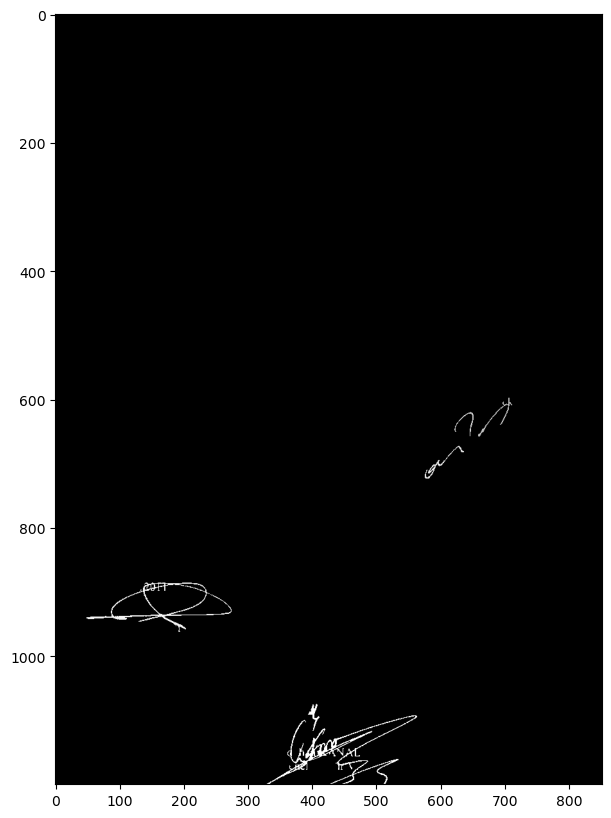

In [9]:
b = morphology.remove_small_objects(blobs_labels, constant)
plt.figure(figsize=(10,10))
plt.imshow(b,cmap='gray')

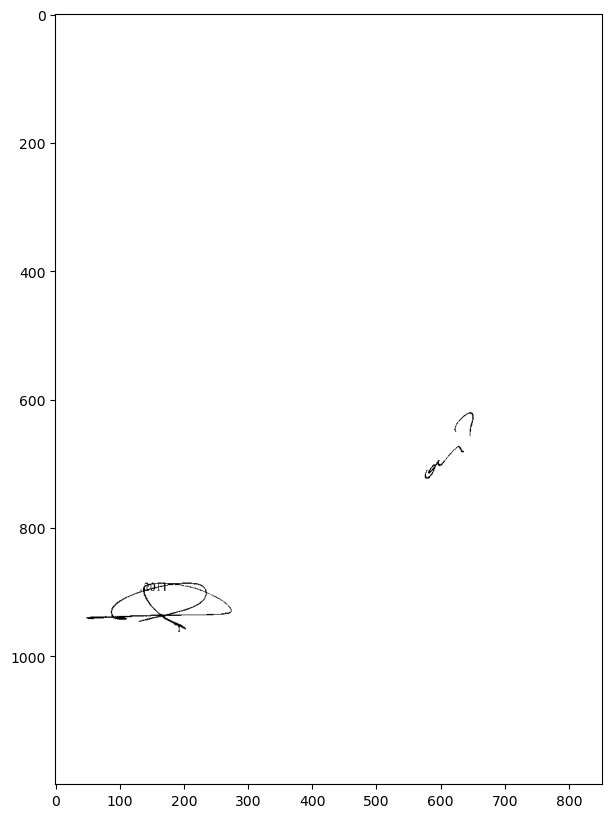

In [10]:
b_uint8 = np.uint8(b)
out = cv2.threshold(b_uint8, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
# save the the result
plt.figure(figsize=(10,10))
plt.imshow(out,cmap='gray')